In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
#specify 3LC to be analyzed
airport="LED"

In [3]:
#Read data from CSV
df=pd.read_csv('./LED.csv')

In [5]:
#Determine if flight is departure
df['DEP'] = df['Dep Airport Code'] == airport

In [44]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
DEP,0,0.0
International/Domestic,0,0.0
Flight No,0,0.0
General Aircraft Code,0,0.0
General Aircraft Name,0,0.0
Specific Aircraft Code,0,0.0
Specific Aircraft Name,0,0.0
Carrier Name,0,0.0
Mainline/Low Cost,0,0.0
Time series,0,0.0


In [45]:
#Descriptive statistics summary
df['Seats (Total)'].describe()
df['General Aircraft Name'].describe()

count                      150556
unique                         24
top       Airbus A318/319/320/321
freq                        82470
Name: General Aircraft Name, dtype: object

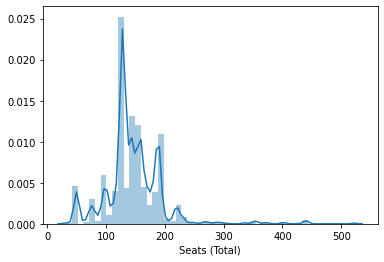

In [46]:
#Histogram Seats
sns.distplot(df['Seats (Total)'])

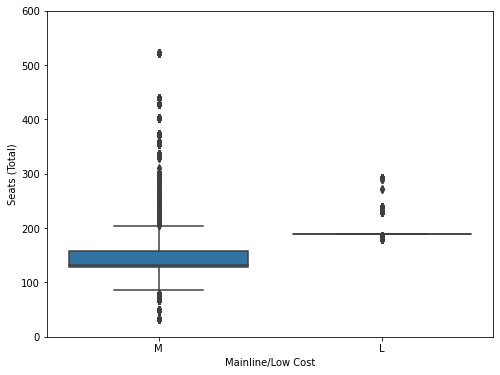

In [47]:
#box plot Seats/Airlinetype
var = 'Mainline/Low Cost'
data = pd.concat([df['Seats (Total)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Seats (Total)", data=data)
fig.axis(ymin=0, ymax=600);

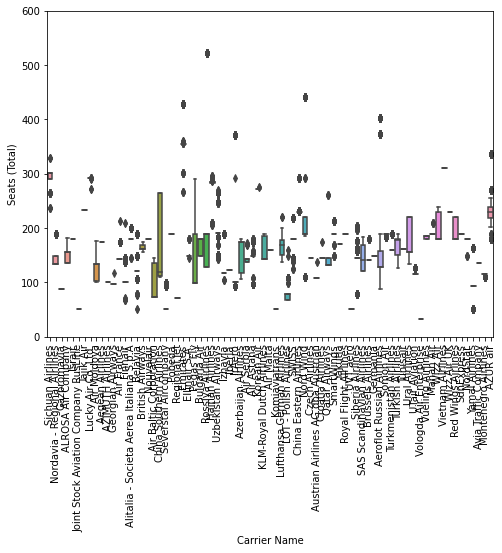

In [48]:
#box plot Seats/Airline
var = 'Carrier Name'
data = pd.concat([df['Seats (Total)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Seats (Total)", data=data)
fig.axis(ymin=0, ymax=600);
plt.xticks(rotation=90);

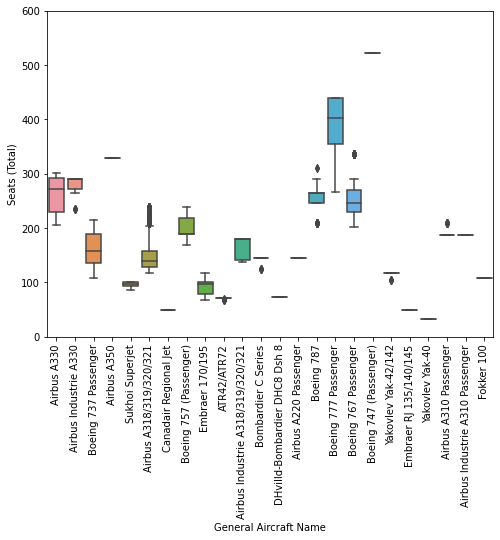

In [49]:
#box plot Seats/Aircraft type
var = 'General Aircraft Name'
data = pd.concat([df['Seats (Total)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Seats (Total)", data=data)
fig.axis(ymin=0, ymax=600);
plt.xticks(rotation=90);

In [ ]:
#Split Year-Month-Date into separate columns and convert strings to floats
df1 = df['Time series'].str.split("-",expand=True,)
df1.columns = ['Y', 'M', 'D']
#df1.columns = ['Y', 'M', 'D', 'H', 'M']
df1=df1.astype(int)
#df = df.join(df1)

df['H'] = [df['Local Dep Time'].astype(str).str[0:1].astype(int) if x == True else 2 for x in df['DEP']]
df
#df2=df['Local Dep Time'].str[0:1]
